In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./archive/train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("./archive/test_Y3wMUE5_7gLdaTN.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test.isnull().sum().sum()

84

In [6]:
data.shape, test.shape

((614, 13), (367, 12))

In [7]:
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
data.drop('Loan_ID', axis=1, inplace=True)

In [9]:
data.shape

(614, 12)

In [10]:
# remove rows with missing values less than 5%

In [11]:
colms = ["Gender", "Dependents", "LoanAmount", "Loan_Amount_Term"]

In [12]:
data.dropna(subset=colms, inplace=True)

In [13]:
data.shape

(553, 12)

In [14]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
print('Self_Employed Mode: ', data['Self_Employed'].mode())
print('Credit_History Mode: ', data['Credit_History'].mode())

Self_Employed Mode:  0    No
dtype: object
Credit_History Mode:  0    1.0
dtype: float64


In [16]:
# fill rows with mode in missing values greater than 5%

In [17]:
data['Self_Employed'].fillna('No', inplace = True)
data['Credit_History'].fillna('1.0', inplace = True)

In [18]:
data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [19]:
data.sample(5) 
# replace 3+ with 4 in Dependents

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
489,Male,No,0,Graduate,No,2435,0.0,75.0,360.0,1.0,Urban,N
88,Male,No,0,Graduate,No,8566,0.0,210.0,360.0,1.0,Urban,Y
94,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
280,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban,N
337,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y


In [20]:
data['Dependents'].replace(to_replace="3+", value="3", inplace=True)

In [21]:
data['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [22]:
# convert categorical colums in numeric values

In [23]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [24]:
data["Gender"].unique()
data["Married"].unique()
data["Education"].unique()
data["Self_Employed"].unique()
data["Property_Area"].unique()
data["Loan_Status"].unique()

array(['N', 'Y'], dtype=object)

In [25]:
data["Gender"] = data["Gender"].map({"Male" : 1, "Female" : 0}).astype('int')
data["Married"] = data["Married"].map({"Yes" : 1, "No" : 0}).astype('int')
data["Education"] = data["Education"].map({"Graduate" : 1, "Not Graduate" : 0}).astype('int')
data["Self_Employed"] = data["Self_Employed"].map({"Yes" : 1, "No" : 0}).astype('int')
data["Property_Area"] = data["Property_Area"].map({"Urban" : 1, "Rural" : 0, "Semiurban" : 2}).astype('int')
data["Loan_Status"] = data["Loan_Status"].map({"Y" : 1, "N" : 0}).astype('int')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int32  
 1   Married            553 non-null    int32  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int32  
 4   Self_Employed      553 non-null    int32  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    object 
 10  Property_Area      553 non-null    int32  
 11  Loan_Status        553 non-null    int32  
dtypes: float64(3), int32(6), int64(1), object(2)
memory usage: 43.2+ KB


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

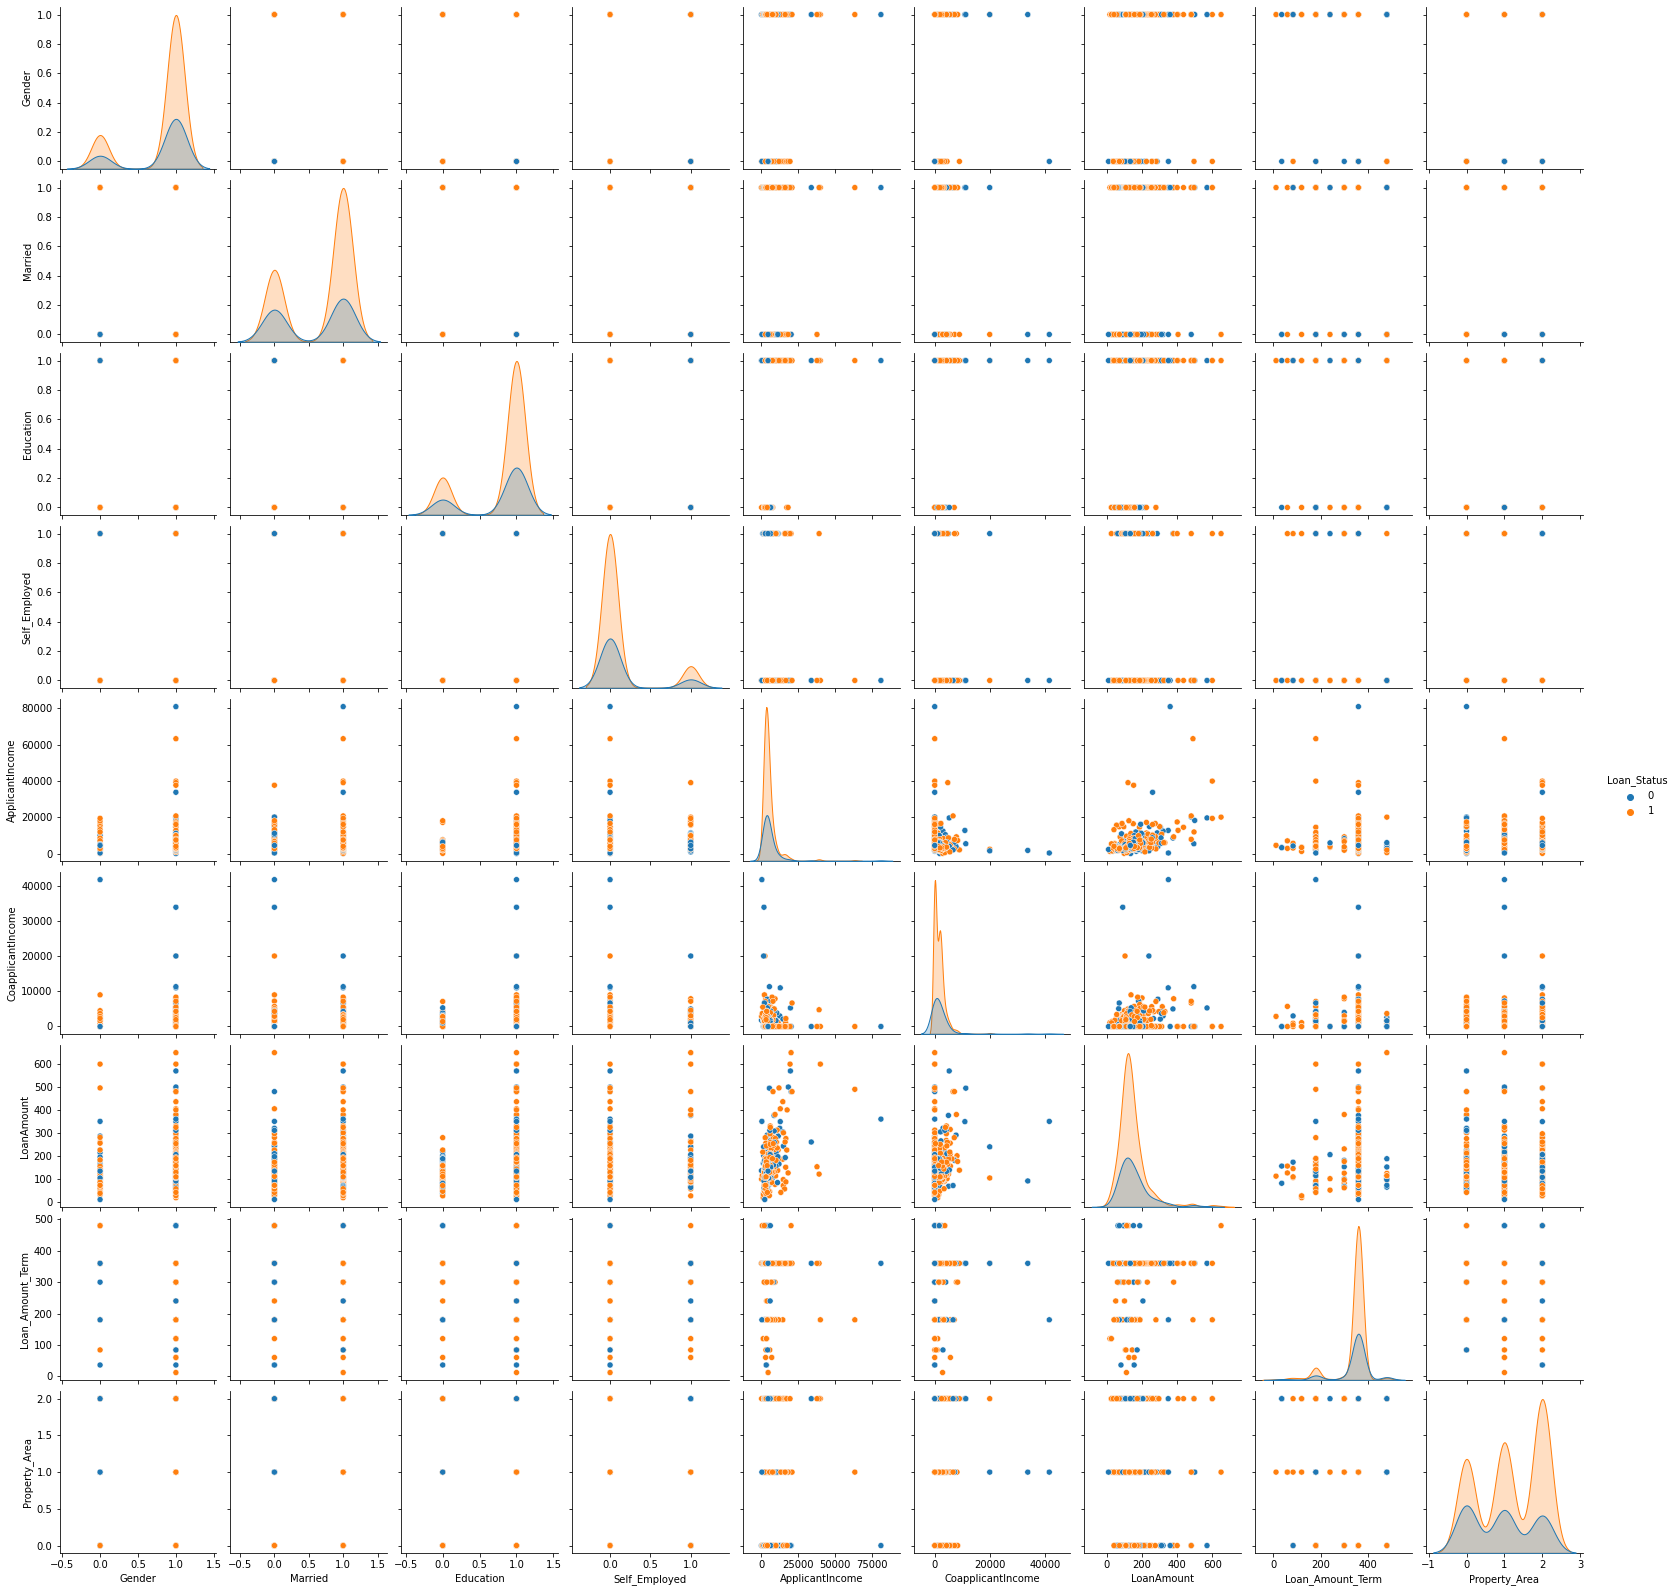

In [38]:
sns.pairplot(data, hue = 'Loan_Status')

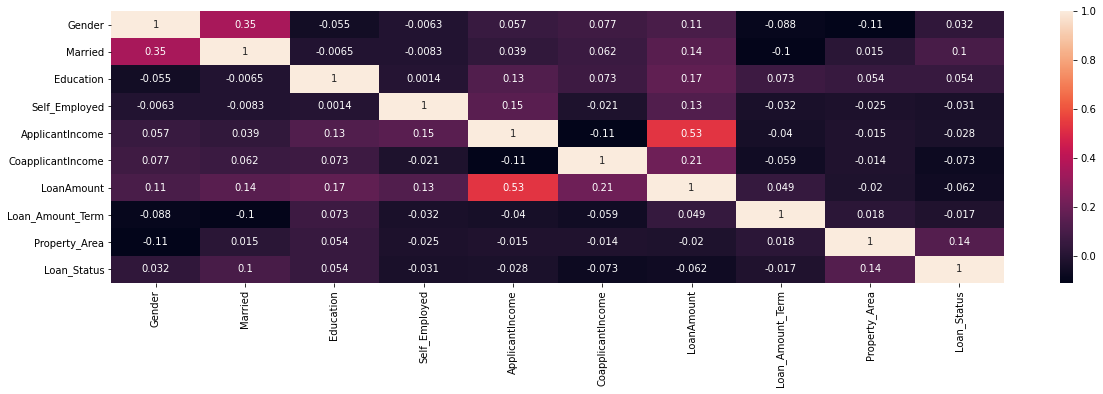

In [49]:
plt.figure(figsize = (20,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [27]:
X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

In [28]:
X.shape, y.shape

((553, 11), (553,))

In [29]:
# feature scaling
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X[cols] = ss.fit_transform(X[cols])

In [33]:
# train test split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [35]:
model_df = {}
def model_train_test(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model, " accuracy score is ", accuracy_score(y_test, y_pred))
    
    score = cross_val_score(model, X, y, cv=5)
    print(model, " average cross_val score is ", np.mean(score))
    model_df[model] = round(np.mean(score) * 100, 2)

In [ ]:
# Logistic regerssion

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_train_test(X, y, lr)

LogisticRegression()  accuracy score is  0.8018018018018018
LogisticRegression()  average cross_val score is  0.8047829647829647


In [52]:
# Random forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 80, max_depth = 10, min_samples_leaf = 12)
model_train_test(X, y, rfc)

RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=80)  accuracy score is  0.8018018018018018
RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=80)  average cross_val score is  0.8066011466011467


In [54]:
# support vector classifier

In [55]:
from sklearn.svm import SVC
svc = SVC()
model_train_test(X, y, svc)

SVC()  accuracy score is  0.8018018018018018
SVC()  average cross_val score is  0.7938902538902539


In [56]:
# decision tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_train_test(X, y, dtc)

DecisionTreeClassifier()  accuracy score is  0.7207207207207207
DecisionTreeClassifier()  average cross_val score is  0.707141687141687


In [59]:
# Gaussion naive baise classifier

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_train_test(X, y, gnb)

GaussianNB()  accuracy score is  0.8288288288288288
GaussianNB()  average cross_val score is  0.7866830466830466


In [60]:
# knn

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_train_test(X, y, knn)

KNeighborsClassifier()  accuracy score is  0.7207207207207207
KNeighborsClassifier()  average cross_val score is  0.7377723177723178


In [63]:
# gradient boosting classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_train_test(X, y, gbc)

GradientBoostingClassifier()  accuracy score is  0.7927927927927928
GradientBoostingClassifier()  average cross_val score is  0.774004914004914


In [66]:
model_df

{LogisticRegression(): 80.48,
 RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=80): 80.66,
 SVC(): 79.39,
 DecisionTreeClassifier(): 70.71,
 GaussianNB(): 78.67,
 KNeighborsClassifier(): 73.78,
 GradientBoostingClassifier(): 77.4}

In [67]:
# Hyper Parameter tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# Random Forest classifier

In [76]:
rfc_grid = {'n_estimators':np.arange(10, 1000, 10), 
            'max_features':['auto', 'sqrt'], 
            'max_depth':[None,3,5,10,20,30,50,100], 
            'min_samples_split':[2,5,20,50,75,100], 
            'min_samples_leaf':[1,2,5,10,20]}

In [77]:
rs_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_grid, cv=5, n_iter=20, verbose=True)

In [78]:
rs_rfc.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30,
                                                      50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 20, 50, 75,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 78

In [79]:
rs_rfc.best_score_

0.8084193284193285

In [80]:
rs_rfc.best_params_

{'n_estimators': 80,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [81]:
# save the model

In [85]:
model = RandomForestClassifier(n_estimators= 80,
 min_samples_split= 50,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20)

In [86]:
model.fit(X, y)

RandomForestClassifier(max_depth=20, min_samples_split=50, n_estimators=80)

In [136]:
import pickle
import joblib

In [138]:
# filename = 'rfc_model.pkl'
# pickle.dump(model, open(filename, 'wb'))

filename = 'rfc'
joblib.dump(model, open(filename, 'wb'))
  
# load the model
load_model = joblib.load(open(filename, 'rb'))

In [139]:
# load_model = pickle.load(open("rfc_model.pkl", 'rb'))

In [140]:
X.iloc[0]

Gender                      1
Married                     1
Dependents                  1
Education                   1
Self_Employed               0
ApplicantIncome     -0.128694
CoapplicantIncome   -0.049699
LoanAmount          -0.214368
Loan_Amount_Term     0.279961
Credit_History            1.0
Property_Area               0
Name: 1, dtype: object

In [141]:
load_model.predict([[1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1,0]])

array([1])

In [150]:
load_model.predict([[1,1,0,0,0,7660,0,104,360,1,0]])

array([0])

In [162]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
574,1,1,3,1,0,6406,0.0,150.0,360.0,1.0,2,0
140,1,1,2,1,0,5042,2083.0,185.0,360.0,1.0,0,0
230,1,1,1,1,0,2491,2054.0,104.0,360.0,1.0,2,1
296,1,1,1,1,0,6875,0.0,200.0,360.0,1.0,2,1
441,1,1,0,1,0,7901,1833.0,180.0,360.0,1.0,0,1
